# Confidence intervals for linear models

In [125]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.metrics import r2_score

In [31]:
# uncertainities library is also used 
# its not build in and needs to be installed manually
# Do a pip install uncertainties
# or if you are using anaconda - 
# conda install -c conda-forge uncertainties
import uncertainties.unumpy as unp
import uncertainties as unc


In [81]:
# set a seed 
np.random.seed(2)

# create a dataset 
# we choose some random int values between 5 t0 40
X = np.random.randn(20)

# let us also create a stimulated y
y = -2 + 1.2*X + 3.1*X**3 +  20*np.random.randn(20)

Text(0.5, 1.0, 'Distribution of data')

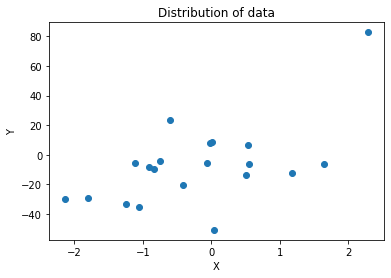

In [82]:
# lets see how it looks 
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribution of data')

In [83]:
# fiting a line using scipy.optimize.fit_curve

In [84]:
def func(x,a,b):
    return a*x + b

In [85]:
popt,pcov = curve_fit(func,X,y)

print('optimal values are: ')
print('a: ',popt[0])
print('b: ',popt[1])

optimal values are: 
a:  14.395113726403645
b:  -3.9594707605583803


In [86]:
# it also returns  a cov matrix
pcov

array([[22.1645231 ,  4.63936688],
       [ 4.63936688, 27.15264151]])

In [87]:
# calculating r2 score 
pred = func(X,popt[0],popt[1])
print('r2 score is ',r2_score(y,pred))

r2 score is  0.34184409891468703


Text(0.5, 1.0, 'Linear fit')

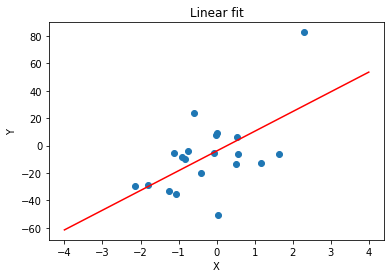

In [90]:
# now generating some test data 
X_test = np.linspace(-4,4,100)

# lets the line for this test data
plt.scatter(X,y)
plt.plot(X_test,func(X_test,popt[0],popt[1]),color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear fit')

In [104]:
# calculate parameter confidence interval
a,b = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))

Uncertainty
a: 14+/-5
b: -4+/-5


In [110]:
# calculate regression confidence interval
px = np.linspace(-3, 3, 100)
py = a*px+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

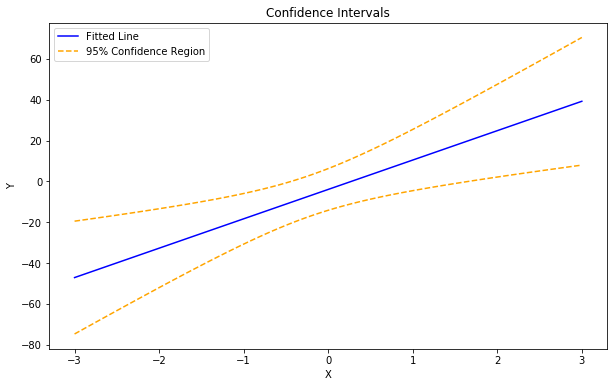

In [123]:
# uncertainty lines (95% confidence)
plt.figure(figsize = (10,6))
plt.plot(px,nom,c = 'blue',label = 'Fitted Line')
plt.plot(px, nom - 1.96 * std, c='orange',\
         label='95% Confidence Region',linestyle = 'dashed')
plt.plot(px,nom + 1.96*std, c = 'orange',linestyle = 'dashed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Confidence Intervals')
plt.legend()

In [139]:
# we can see from the above graph that the width of confidence intervals in minimum at x = 0 (mean of x)